<a href="https://colab.research.google.com/github/fwangboulder/AI_talk/blob/main/langchain_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LangChain** is a framework for developing applications powered by language models. It enables applications that:

**Are context-aware**: connect a language model to sources of context (prompt instructions, few shot examples, content to ground its response in, etc.)

**Reason**: rely on a language model to reason (about how to answer based on provided context, what actions to take, etc.)

Reference: [Langchain](https://colab.research.google.com/drive/1VOwJpcZqOXag-ZXi-52ibOx6L5Pw-YJi?usp=sharing#scrollTo=RlxEmS1CaM5v)


In [1]:
#Installation
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.3 MB/s eta 0:00:00


In [2]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 2.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [3]:
from getpass import getpass
openai_api_key = getpass('Enter the secret value: ')
import os
os.environ["OPENAI_API_KEY"] = openai_api_key

Enter the secret value: ··········


In [4]:
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI

llm = OpenAI()

In [5]:
chat_model = ChatOpenAI()

In [6]:
text = "What would be a good company name for a company that makes colorful socks?"

llm.predict(text)

'\n\nBrightSox.'

In [7]:
chat_model.predict(text)


'Rainbow Threads'

In [8]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts.chat import ChatPromptTemplate
from langchain.schema import BaseOutputParser

class CommaSeparatedListOutputParser(BaseOutputParser):
    """Parse the output of an LLM call to a comma-separated list."""


    def parse(self, text: str):
        """Parse the output of an LLM call."""
        return text.strip().split(", ")

template = """You are a helpful assistant who generates comma separated lists.
A user will pass in a category, and you should generate 5 objects in that category in a comma separated list.
ONLY return a comma separated list, and nothing more."""
human_template = "{text}"

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", template),
    ("human", human_template),
])
chain = chat_prompt | ChatOpenAI() | CommaSeparatedListOutputParser()
chain.invoke({"text": "colors"})
# >> ['red', 'blue', 'green', 'yellow', 'orange']

['red', 'blue', 'green', 'yellow', 'purple']

LangChain provides tools to **interact with SQL Databases**:

1. Build SQL queries based on natural language user questions
2. Query a SQL database using chains for query creation and execution
3. Interact with a SQL database using agents for robust and flexible
querying

**Reference**: [Intro to SQL](https://colab.research.google.com/github/tdmdal/mma-sql-2021/blob/master/docs/SQL_Intro_Sqlite.ipynb#scrollTo=DkcFjUPZP5i7)

In [9]:
! pip install langchain langchain-experimental openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 3.3 MB/s eta 0:00:00


Create Chinook.db
1. download https://github.com/lerocha/chinook-database/blob/master/ChinookDatabase/DataSources/Chinook_Sqlite.sql
2. (In the same folder path as Chinook_Sqlite.sql)terminal:


```
sqlite3 Chinook.db

.read Chinook_Sqlite.sql

SELECT * FROM Artist LIMIT 10;

.quit
```



**Reference**: https://database.guide/2-sample-databases-sqlite/

Upload the Chinook.db to colab


In [49]:
# load the SQL magic extension
# https://github.com/catherinedevlin/ipython-sql
# this extension allows us to connect to DBs and issue SQL command
%load_ext sql

# now we can use the magic extension to connect to our SQLite DB
# use %sql to write an inline SQL command
# use %%sql to write SQL commands in a cell
%sql sqlite:///Chinook.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [50]:
%%sql
SELECT sqlite_version();

 * sqlite:///Chinook.db
   sqlite:///northwind.db
   sqlite:///northwind.sqlite3
Done.


sqlite_version()
3.37.2


In [48]:
%%sql
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';


 * sqlite:///Chinook.db
   sqlite:///northwind.db
   sqlite:///northwind.sqlite3
Done.


name
Album
Artist
Customer
Employee
Genre
Invoice
InvoiceLine
MediaType
Playlist
PlaylistTrack




```
# This is formatted as code
```

### How about the relationships between the tables?

The Chinook Database holds information about a music store. For this project, you will be assisting the Chinook team with understanding the media in their store, their customers and employees, and their invoice information. To assist you in the queries ahead, the schema for the Chinook Database is provided below. You can see the columns that link tables together via the arrows.
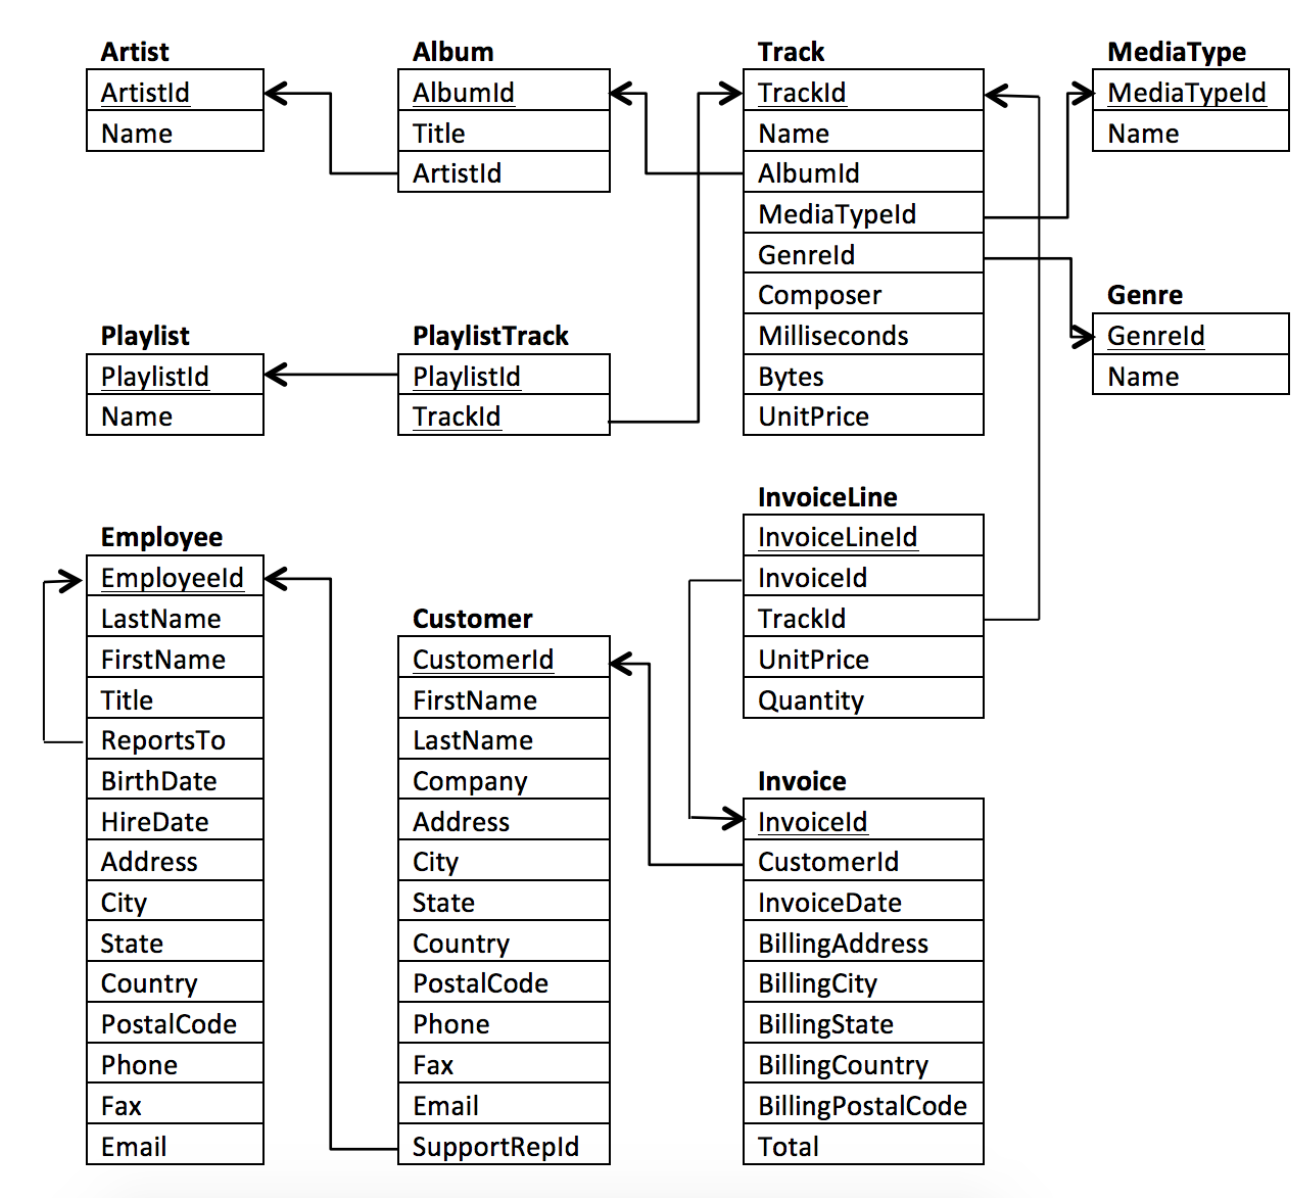

In [51]:
from langchain.utilities import SQLDatabase
from langchain.llms import OpenAI
from langchain_experimental.sql import SQLDatabaseChain

db = SQLDatabase.from_uri("sqlite:///Chinook.db")
llm = OpenAI(temperature=0, verbose=True)
db_chain = SQLDatabaseChain.from_llm(llm, db, verbose=True)


In [52]:
# Example: Retrieve information about employees
query = "SELECT * FROM employee LIMIT 5;"
response = db_chain.run(query)
print(response)




> Entering new SQLDatabaseChain chain...
SELECT * FROM employee LIMIT 5;
SQLQuery:SELECT "EmployeeId", "LastName", "FirstName", "Title", "ReportsTo", "BirthDate", "HireDate", "Address", "City", "State", "Country", "PostalCode", "Phone", "Fax", "Email" FROM "Employee" LIMIT 5;
SQLResult: [(1, 'Adams', 'Andrew', 'General Manager', None, '1962-02-18 00:00:00', '2002-08-14 00:00:00', '11120 Jasper Ave NW', 'Edmonton', 'AB', 'Canada', 'T5K 2N1', '+1 (780) 428-9482', '+1 (780) 428-3457', 'andrew@chinookcorp.com'), (2, 'Edwards', 'Nancy', 'Sales Manager', 1, '1958-12-08 00:00:00', '2002-05-01 00:00:00', '825 8 Ave SW', 'Calgary', 'AB', 'Canada', 'T2P 2T3', '+1 (403) 262-3443', '+1 (403) 262-3322', 'nancy@chinookcorp.com'), (3, 'Peacock', 'Jane', 'Sales Support Agent', 2, '1973-08-29 00:00:00', '2002-04-01 00:00:00', '1111 6 Ave SW', 'Calgary', 'AB', 'Canada', 'T2P 5M5', '+1 (403) 262-3443', '+1 (403) 262-6712', 'jane@chinookcorp.com'), (4, 'Park', 'Margaret', 'Sales Support Agent', 2, '1947

In [53]:
db_chain.run("How many employees are there?")



> Entering new SQLDatabaseChain chain...
How many employees are there?
SQLQuery:SELECT COUNT(*) FROM "Employee";
SQLResult: [(8,)]
Answer:There are 8 employees.
> Finished chain.


'There are 8 employees.'

In [61]:
db_chain.run("Which countries have the most Invoices?")



> Entering new SQLDatabaseChain chain...
Which countries have the most Invoices?
SQLQuery:SELECT "BillingCountry", COUNT("InvoiceId") AS "NumberOfInvoices" FROM "Invoice" GROUP BY "BillingCountry" ORDER BY "NumberOfInvoices" DESC LIMIT 5;
SQLResult: [('USA', 91), ('Canada', 56), ('France', 35), ('Brazil', 35), ('Germany', 28)]
Answer:The countries with the most Invoices are USA, Canada, France, Brazil, and Germany.
> Finished chain.


'The countries with the most Invoices are USA, Canada, France, Brazil, and Germany.'

In [68]:
db_chain.run("Which city has the best customers?") # This answer is wrong



> Entering new SQLDatabaseChain chain...
Which city has the best customers?
SQLQuery:SELECT City, COUNT(*) AS CustomerCount FROM Customer GROUP BY City ORDER BY CustomerCount DESC LIMIT 5;
SQLResult: [('São Paulo', 2), ('Prague', 2), ('Paris', 2), ('Mountain View', 2), ('London', 2)]
Answer:São Paulo, Prague, Paris, Mountain View, and London have the best customers.
> Finished chain.


'São Paulo, Prague, Paris, Mountain View, and London have the best customers.'

In [56]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import create_sql_query_chain

In [57]:
chain = create_sql_query_chain(ChatOpenAI(temperature=0), db)
response = chain.invoke({"question": "Which countries have the most Invoices?"})
print(response)

SELECT "BillingCountry", COUNT(*) AS "TotalInvoices"
FROM "Invoice"
GROUP BY "BillingCountry"
ORDER BY "TotalInvoices" DESC
LIMIT 5;


In [73]:
chain = create_sql_query_chain(ChatOpenAI(temperature=0), db)
response = chain.invoke({"question": "Which city has the best customers?"})
print(response)


SELECT City, COUNT(CustomerId) AS TotalCustomers
FROM Customer
GROUP BY City
ORDER BY TotalCustomers DESC
LIMIT 1


In [74]:
%%sql
SELECT City, COUNT(CustomerId) AS TotalCustomers
FROM Customer
GROUP BY City
ORDER BY TotalCustomers DESC
LIMIT 1

 * sqlite:///Chinook.db
   sqlite:///northwind.db
   sqlite:///northwind.sqlite3
Done.


City,TotalCustomers
São Paulo,2
